# Notebook 3: Linear Regression (Diabetes)

## Learning Goal  
The goal of this notebook is to get hands-on experience and intuition about linear regression and regularization. We once again emphasize the difference between fitting and predicting: **it is much more difficult to get good out-of-sample/test performance on a test set (predicting) than it is to get good in-sample/training performance on the training set (fitting)**.

## Overview:

In Notebook 1: __Section II: Machine Learning is difficult__, we explored linear regression in the context of a prediction problem. In this notebook, we'll formally introduce the notion of regression and see **how learning and prediction can be improved by introducing regularization to reduce overfitting**. We will focus mainly on simple applications of linear regression: minimizing the mean square-error (MSE) on the training data (i.e. in-sample/training error) and see how well we perform on the test data (i.e. out-of-sample/test error). 


As we discussed in Sec. II of the review, **there is a fundamental difference between minimizing the training and minimizing the test error**. The underlying reason for this is that the training data may not be representative of the full data distribution. From a Bayesian point of view, as [David MacKay](http://www.inference.org.uk/mackay/) likes to repeat: <i>We can't make predictions without making assumptions.</i> Thus, it is sensible to introduce priors that reflect the fact that we are likely to be undersampled (especially in high dimensions).

We'll consider **ordinary least squares regression** in which the "error function", also called **loss**, is the MSE. We will supplement this loss with a regularizer in order to prevent overfitting. From a Bayesian point of view, the regularization can be thought of as a prior on parameters, see Sec VI.
Minimizing the combined regularized loss consisting of the (training MSE + regularization term) is the same as the <b> Maximum A Posteriori (MAP)</b> estimate in Bayesian regression: i.e., choosing the parameters at which the posterior probability distribution is peaked (also called the mode of the posterior distribution). Note that in a fully Bayesian approach, we should not use the mode of the posterior but the average over all possible choices of parameters weighted by their posterior probability. In practice, this is often not done (for computational and practical reasons).



## (Ordinary) Least squares linear regression: 

Consider training data ${\cal D}^{\rm train}=\{(y_i,\mathbf{x}^{(i)})\}_{i=1}^{N_{\rm train}}$, where the examples/data points $\mathbf{x}^{(i)}$ are $p$-dimensional (column) features vectors. For notational convenience, it is useful to define the <b>design/data matrix</b> $X\in\mathbb{R}^{N_{\rm train} \times p}$ whose rows, $\mathbf{X}_{1,:}=(\textbf{x}^{(1)})^\intercal,\ldots, \mathbf{X}_{N_{\rm train},:}=(\textbf{x}^{(N_{\rm train})})^\intercal$, are the examples and columns, $\mathbf{X}_{:,1},\cdots, \mathbf{X}_{:,p}$, are the measured "features" (also called feature predictors). We also denote the $N_{\rm train}$-dimensional (column) vector $\mathbf{y}$ and the $p$-dimensional (column) vector of regression parameters $\mathbf{w}\in\mathbb{R}^p$.

For ordinary least square regression (no regularization), we minimize the MSE/square loss cost function on the training set:

$$
\hat{\textbf{w}}=\underset{\textbf{w}\in\mathbb{R}^p}{\rm argmin} \,\|\textbf{Xw}-\textbf{y}\|_2^2 = \underset{\textbf{w}\in\mathbb{R}^p}{\rm argmin} \,(\mathbf{Xw}-\mathbf{y})^\intercal(\mathbf{Xw}-\mathbf{y})=\underset{\textbf{w}\in\mathbb{R}^p}{\rm argmin}\sum_{i=1}^{N_{\rm train}} (y_i -\mathbf{w}\cdot\mathbf{x}^{(i)})^2.
$$

If ${\rm rank}(\mathbf{X})=p$, namely, the feature predictors $\mathbf{X}_{:,1},\cdots \mathbf{X}_{:,p}$ are **linearly independent**, then there exists a unique **least square solution** to this problem explicitely given by:

$$
\hat{\textbf{w}}= (\mathbf{X}^\intercal\mathbf{X})^{-1}\mathbf{X}^\intercal \textbf{y}.
$$

### Exercise 1: ###  
<ul>


<li> The least square solution corresponds to the maximum likehood estimate of which Likelihood function? 

<li> Derive $\hat{\textbf{w}}$ explicitly by solving the least square problem defined above.


<li> Consider a realizable rule setting: $\mathbf{y}=\mathbf{X}\mathbf{w}_{\rm true}+\boldsymbol{\eta}$ where the noise variables $\eta_i\sim{\cal N}(0,\sigma^2)$ are independent. In this case, is $\hat{\textbf{w}}$ a biased or an unbiased estimator of the true model parameters $\mathbf{w}_{\rm true}$? In other words, does it give the correct answer as the number of training data points goes to infinity $N_{\rm train} \rightarrow \infty$, or equivalently, in expectation over the independent data points $(y_i,\mathbf{x}^{(i)})$? 

<li> Is $\hat{\textbf{w}}$ still well-defined when rank$(\mathbf{X})<p$? This happens when, for example, $N_{\rm train}<p$. 

<li> Consider again the realizable setting: $y_i=\textbf{w}_\text{true}\cdot \textbf{x}^{(i)}+\eta_i$ where $\eta_i\sim\mathcal{N}(0,\sigma^2)$ are i.i.d. Gaussian errors. The expected (over the data) square loss between the true values of the response $\textbf{w}_\text{true}\cdot \textbf{x}^{(i)}$ and the least squares prediction, also called the in-sample risk $R_{\rm in}$, is
$$
R_{\rm in}= \frac{1}{N_{\rm train}}\mathbb{E}\big[\|\mathbf{X}\hat{\textbf{w}}-\mathbf{X}{\textbf{w}_\text{true}}\|_2^2\big],
$$
where $\mathbb{E}[\cdots]$ is taken over all i.i.d. pairs $(y_i,\textbf{x}^{(i)})$ and $\hat{\textbf{w}}$ is the least squares solution given above. Assuming, as always, that $\mathbf{X}$ and $\boldsymbol{\eta}$ are independent, show that 
$$
R_{\rm in} = \sigma^2\frac{p}{N_{\rm train}}.
$$
Note that the definition of in-sample risk is very close to the expected training error/training risk
$$
R_{\rm train}=\frac{1}{N_{\rm train}}\mathbb{E}\big[\|\mathbf{X}\hat{\textbf{w}}-\mathbf{y}\|_2^2\big].
$$
Deduce from the fomula of the in-sample risk using some more algebra that 
$$R_{\rm train}=\sigma^2\big(1-\frac{p}{N_{\rm train}}\big).$$       
<li> Still in the same realizable setting, assume that the test design matrix is the same as the one used for the training, but the noise is independent from the one in the training data. So the test data set is ${\cal D}^{\rm test}=\{(y'_i,\textbf{x}^{(i)})\}_{i=1}^{N_{\rm train}}$ (we have $N_{\rm test}=N_{\rm train}$) with $\mathbf{y}'=\mathbf{X}\mathbf{w}_{\rm true}+\boldsymbol{\eta}'$, where $\eta'_i\sim\mathcal{N}(0,\sigma^2)$ are i.i.d. Gaussian errors independent from the noise in the training data. Show similarly as before that the generalization/prediction error, or out-of-sample risk, is
$$
R_{\rm out}=\frac{1}{N_{\rm test}}\mathbb{E}\big[\|\mathbf{X}\hat{\textbf{w}}-\mathbf{y}'\|_2^2\big] = \sigma^2\big(1+\frac p{N_{\rm test}}\big).
$$    
What's the implication of the formulas for the training risk and generalization error for fixed $p$ as $N_{\rm train}=N_{\rm test} \rightarrow \infty$? How about the "high-dimensional settings", i.e., when $p,N_{\rm train}$ scale together? 
</ul>

From Exercise 1, it is clear that the uniqueness of the solution is only guaranteed when rank$(\mathbf{X})\ge p$. Otherwise the problem is underdetermined/underconstrained, $\mathbf{X}^\intercal\mathbf{X}$ is singular and therefore cannot be inverted, so that the number of solutions is infinite. But even if the least square solution is uniquely defined, we still may not want to use it if $p$ is moderately close to $N_{\rm train}$ or if some of the features are only "weakly" linearly independent (which may imply in both cases that $\mathbf{X}^\intercal\mathbf{X}$ is ill-conditionned), because its "risk" could be quite poor. One way to deal with this is to  <i> regularize</i>.

We will be concerned with two classes of regularizers: <b> L2-regularization</b> which is often called <b> ridge regression</b> (or <b>Tikhonov regression</b>) and <b> L1-regularization</b> which goes under the name <b>LASSO</b> (least absolute shrinkage and selection operator), and is closely related to <b>compressed sensing</b>.


## Ridge regression
In ridge regression, the regularization penalty is taken to be the L2-norm of the parameters:
$$
E_{\rm ridge}= \lambda \|\textbf{w}\|_2^2 = \lambda \textbf{w}^\intercal \textbf{w}=\lambda \sum_{i=1}^p w_i^2.
$$
Thus, the model is fit by minimizing the sum of the in-sample error and the regularization term:
$$
\hat{\mathbf{w}}_{\rm ridge}(\lambda)= \underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{argmin}} \|\mathbf{X}\textbf{w}-\textbf{y}\|_2^2 + \lambda \|\textbf{w}\|_2^2.
$$
Notice that the parameter $\lambda$ controls how much we weigh the fit and regularization term.

### Exercise 2: ###  
<ul>
<li>In the Bayesian formulation, what choice of prior and posterior does this correspond to if we are performing a MAP estimate?
<li>Show that the solution to ridge regression is given by $$\hat{\mathbf{w}}_{\rm ridge}= (\mathbf{X}^\intercal\mathbf{X}+\lambda \,{\rm I}_{p})^{-1}\mathbf{X}^\intercal \textbf{y}.$$ 
In which scenarios for the design matrix $\mathbf{X}$ is the regularization useful, or even absolutely necessary?

## LASSO ##

We will also be interested in the case where the penalty is the L1-norm of the parameters (sum of absolute values of parameters). This is called LASSO.
$$
E_{\rm LASSO}= \lambda \|\mathbf{w}\|_1 = \lambda \sum_{i=1}^p |w_i| .
$$
In this case, 
$$
\hat{\textbf{w}}_{\rm LASSO}(\lambda)= \underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{argmin}} {1 \over 2N_{\rm train}} \|\mathbf{Xw}-\mathbf{y}\|_2^2 + \lambda \|\mathbf{w}\|_1.
$$
Note that the prefactor $1/(2N_{\rm train})$ in the loss function is not essential to this formulation. We have chosen this form to be consistent with the Scikit-Learn package in Python. LASSO tends to give **sparse solutions** (i.e., solutions with a fraction of null components). In the following we're going to explore these ideas a little bit more.


### Exercise 3: ###  
<ul>
<li>What choice of prior does this correspond to if we are performing a MAP estimate?
<li>In this case, can you derive an analytic expression for $\mathbf{w}_{\rm LASSO}$? 
<li> Do you think LASSO and ridge regression will give qualitatively different answers? (Consider the limits $\lambda=0$ and $\lambda = \infty$)
</ul>

## Numerical experiments with ridge regression and LASSO##

We will now perform some numerical experiments with the Diabetes Dataset **trying to predict diabetes outcomes one year forward**. More information about this data set can be found at <a href="https://archive.ics.uci.edu/ml/datasets/Diabetes">https://archive.ics.uci.edu/ml/datasets/Diabetes</a>. This dataset was described in the famous <a href="http://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf">Least Angle Regression</a> paper by Efron, Hastie, Johnstone, Tibshirani as follows:
<blockquote>Ten baseline variables [features], age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of $n = 442$ diabetes patients, as well as the
response of interest, a quantitative measure of disease progression one year after baseline.</blockquote>


We start by plotting the weights for each value of $\lambda$ for ridge regression and LASSO. This is called a regularization path. We also compare the in-sample and out-of-sample performance between two regressions by examining the $R^2$ coefficient of determination (for detailed definition see <a href="https://en.wikipedia.org/wiki/Coefficient_of_determination">here</a>). In terms of linear regression, $R^2$ tells us how well the regression function fits the data. The best attainable fit corresponds to $R^2=1$.


Automatically created module for IPython interactive environment
['number training data points', 25]
['number test data points', 417]


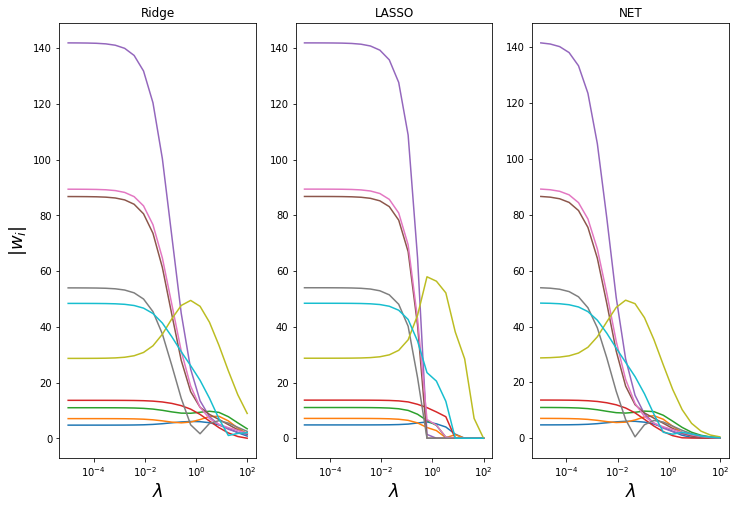

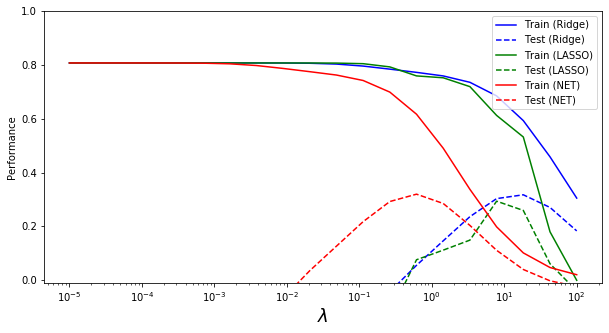

In [3]:
from __future__ import print_function
print(__doc__)

# This code is modified from plot_cv_diabetes.py in the skit-learn documentation and plot_ridge_path.py

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model
import warnings
warnings.filterwarnings('ignore')

# Load Training Data 
number_examples=442
diabetes = datasets.load_diabetes()
X = diabetes.data[:number_examples]
y = diabetes.target[:number_examples]

# standardize data
X=np.transpose(np.array([(X[:,i]-np.mean(X[:,i])*np.ones(number_examples))/np.std(X[:,i]) for i in range(X.shape[1])]))
# or simply with sklearn
#scaler = StandardScaler()
#scaler.fit(X)
#X=scaler.transform(X)

# Set up Lasso and Ridge Regression models
ridge=linear_model.Ridge()
lasso = linear_model.Lasso()
net=linear_model.ElasticNet()

# Chooose paths
alphas = np.logspace(-5, 2, 20)

# To see how well we learn, we partition the dataset into a training set 
# as well as a test set. We record their errors respectively.
n_samples_train = 25
X_train, X_test = X[:n_samples_train], X[n_samples_train:]
y_train, y_test = y[:n_samples_train], y[n_samples_train:]
print(["number training data points", y_train.shape[0]])
print(["number test data points",y_test.shape[0]])

train_errors_ridge = []
test_errors_ridge = []
train_errors_lasso = []
test_errors_lasso = []
train_errors_net = []
test_errors_net = []
coefs_ridge=[]
coefs_lasso=[]
coefs_net=[]
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)
    # Use the coefficient of determination R^2 as the performance of prediction.
    train_errors_ridge.append(ridge.score(X_train, y_train))
    test_errors_ridge.append(ridge.score(X_test, y_test))
    
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)    
    train_errors_lasso.append(lasso.score(X_train, y_train))
    test_errors_lasso.append(lasso.score(X_test, y_test))
    
    
    net.set_params(alpha=a,l1_ratio=0.01)
    net.fit(X_train, y_train)
    coefs_net.append(net.coef_)
    train_errors_net.append(net.score(X_train, y_train))
    test_errors_net.append(net.score(X_test, y_test))
    
# ###############################################################################
# # Display results

# # First see how the 10 features we learned scale as we change the regularization parameter
fig = plt.figure(figsize=(12, 8))
plt.subplot(1,3,1)
plt.semilogx(alphas, np.abs(coefs_ridge))
axes = plt.gca()
#ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('$|w_i|$',fontsize=18)
plt.title('Ridge')

plt.subplot(1,3,2)
plt.semilogx(alphas, np.abs(coefs_lasso))
axes = plt.gca()
#ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel(r'$\lambda$',fontsize=18)
#plt.ylabel('$|\mathbf{w}|$',fontsize=18)
plt.title('LASSO')

plt.subplot(1,3,3)
plt.semilogx(alphas, np.abs(coefs_net))
axes = plt.gca()
#ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel(r'$\lambda$',fontsize=18)
#plt.ylabel('$|\mathbf{w}|$',fontsize=18)
plt.title('NET')

plt.show()

fig = plt.figure(figsize=(10, 5))
# Plot our performance on both the training and test data
plt.semilogx(alphas, train_errors_ridge, 'b',label='Train (Ridge)')
plt.semilogx(alphas, test_errors_ridge, '--b',label='Test (Ridge)')
plt.semilogx(alphas, train_errors_lasso, 'g',label='Train (LASSO)')
plt.semilogx(alphas, test_errors_lasso, '--g',label='Test (LASSO)')
plt.semilogx(alphas, train_errors_net, 'r',label='Train (NET)')
plt.semilogx(alphas, test_errors_net, '--r',label='Test (NET)')
#plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
#           linewidth=3, label='Optimum on test')
plt.legend(loc='upper right')
plt.ylim([-0.01, 1.0])
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('Performance')
plt.show()

### Exercise 4: ###  
<ul>
<li>What do the points $\lambda=0$ and $\lambda=10^5$ correspond to? Is it strange that the weights are not monotonic in $\lambda$? Why do you think this might be?
<li> What is the qualitative difference between the LASSO path and Ridge Path? Does this agree with your earlier predictions? Can you make some qualitative argument to rationalize this difference?
<li>How do your answers change when you vary the number of examples and training set size?
</ul>

## A brief note about convexity##

In Sec. VI of the review, we briefly discussed convexity. Here's a quick refresher: Recall that a set $C\subseteq\mathbb{R}^n$ is called <i> convex </i> if any $x,y\in C$ and $t\in [0,1]$, 
$$
tx+(1-t)y \in C.
$$
In other words, every line segments joining $x,y$ lies entirely in $C$. 

A function $f:\mathbb{R}^n\rightarrow \mathbb{R}$ is called <i> convex </i> if its domain dom$(f)$ is a convex set and for any $x,y\in$dom$(f)$ and $t\in [0,1]$, 

$$
f(tx+(1-t)y)\le tf(x)+(1-t)f(y).
$$
In other words, the function lies below the line segment joining $f(x)$ and $f(y)$. This function $f$ is called <b> strictly convex </b> if this inequality holds strictly for $x\neq y$ and $t\in(0,1)$. 

Why is convexity important?  <b> For convex functions, any local minimizer is a global minimizer</b>. Algorithmically, this means that in the minimization (optimization) procedure, as long as we're "going down the hill" and agree to stop when we can't go any further, then we've hit the global minimum. In addition to this, there's a menagerie of beautiful theory regarding convex duality and optimality, which gives us a way of understanding the solutions even before solving the problem itself. We refer interested readers to  <a href="http://web.stanford.edu/~boyd/cvxbook/">Boyd and Vandenberghe book on Convex Optimization</a>.


Coming back to our regularization examples, a simple inspection reveals that both LASSO and Ridge regression are convex in $w$. What's more, Ridge is actually a <i> strictly convex </i> problem (assuming $\lambda>0$) due to presence of L2 penality. In fact, this is always true regardless of $X$ and so the ridge regression solution you worked out (presumably) in Exercise 2 is always well-defined.

In contrast, LASSO is not always strictly convex and hence by convexity
theory, it need not have a unique solution (even if it is unique under quite general conditions, see <a href="https://arxiv.org/abs/1206.0313"> Tibshirani 2013</a>). To mitigate this, one can define a modified problem called the <a href="https://web.stanford.edu/~hastie/Papers/B67.2%20(2005)%20301-320%20Zou%20&%20Hastie.pdf">elastic net</a> such that the function we want to minimize is always strictly convex:

$$
\hat{\textbf{w}}_{\rm net}(\lambda)= \underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{argmin}} \|\mathbf{Xw}-\mathbf{y}\|_2^2 + \lambda \|\mathbf{w}\|_1 + \delta\|\mathbf{w}\|_2^2,
$$
where $\lambda,\delta\ge 0$ are regularization parameters. Now aside from uniqueness of the solution, the elastic net combines some of the desirable properties (e.g. prediction) of ridge regression with the sparsity properties of the LASSO. In the following exercise, you're going to explore a little bit about elastic net.

### Exercise 4: ###  
<ul>
<li> Play with the parameters $\lambda$ and $\delta$, when would you expect sparse solutions?

<li> Plot the regularization path of elastic net. How does it depend on $\lambda$ and $\delta$?

</ul>

### End-of-notebook questions ###  
<ul>

<li> Can you explain the difference between in-sample and out-of-sample performance? Is out-of-sample error usually larger than in-sample error? Does this depend on regularization? Recall in Exercise 1, we defined the in-sample risk as 

$$
R_{\rm in}= \frac{1}{N_{\rm train}}\mathbb{E}\big[\|\mathbf{X}\hat{\textbf{w}}-\mathbf{X}{\textbf{w}_\text{true}}\|_2^2\big],
$$ 
where $\hat{\textbf{w}}= (\mathbf{X}^\intercal \mathbf{X})^{-1}\mathbf{X}^\intercal \textbf{y}$ is the least square solution and $\textbf{w}_\text{true}$ is the true parameter vector used to generate all samples. Following the same notations and assumptiosn, now imagine if we're given a new data point $\textbf{x}'$ nor present in the training data and independently drawn from the predictor distribution $\mathcal{P}$. The out-of-sample risk is then 
$$
R_{\rm out} =\mathbb{E}_{\textbf{x}^{(0)}\sim\mathcal{P}}\mathbb{E}_{(y_i,\textbf{x}_i)}[(\hat{\textbf{w}}\cdot \textbf{x}' -\textbf{w}_\text{true}\cdot \textbf{x}')^2],
$$
with the expectation value taken not only over the training samples $\{(y_i,\textbf{x}_i)\}$ but also over the predictor distribution $\mathcal{P}$ that generates the unseen sample $\textbf{x}'$. One can actually show that $R_{\in out}\ge R_{\rm in}$ under mild assumptions. This makes sense intuitively since **it's usually harder to make prediction on unseen samples than to fit the samples given**. You can numerically verify this by assuming a predictor distribution, say, $\mathcal{N}(0,\Sigma)$.
</ul>